# Engineering Economics / Python project


## data cleaning 
 

### Importing the necessary liberaries

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
from functions import *

### Loading The Data

In [3]:
data = pd.read_excel('data.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Years       33 non-null     int64  
 1   Salary      30 non-null     float64
 2   material 1  33 non-null     float64
 3   material 2  33 non-null     float64
 4   demand      33 non-null     int64  
 5   price       33 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 1.7 KB


### Dealing with Missing Values


In [4]:
missing_values = data.isnull().sum()
missing_values


Years         0
Salary        3
material 1    0
material 2    0
demand        0
price         0
dtype: int64

In [5]:
data = data.interpolate(method='linear')
data

,Years,Salary,material 1,material 2,demand,price
0,1990,39343.0,200.000000,89.600000,103,1200.0
1,1991,46205.0,212.000000,92.662500,104,1375.0
2,1992,37731.0,224.720000,95.807250,101,1451.0
3,1993,43525.0,238.203200,99.034819,99,1593.0
4,1994,39891.0,252.495392,102.345626,95,1718.5
5,1995,56642.0,267.645116,105.739927,96,1844.0
6,1996,60150.0,283.703822,109.217795,95,1969.5
7,1997,54445.0,300.726052,112.779099,92,2095.0
8,1998,64445.0,318.769615,116.423489,92,2220.5
9,1999,57189.0,337.895792,120.150370,87,2346.0


## Predicting


### Predicting Future Salaries with Linear Regression

In [6]:
X = data['Years'].values.reshape(-1,1)
Y = data['Salary'].values.reshape(-1,1)
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [7]:
intercept = model.intercept_[0]
coefficient = model.coef_[0][0]

score = model.score(X,Y)
score

0.9312739842698768

### Visuallizing the Fitted Line for the Prediction



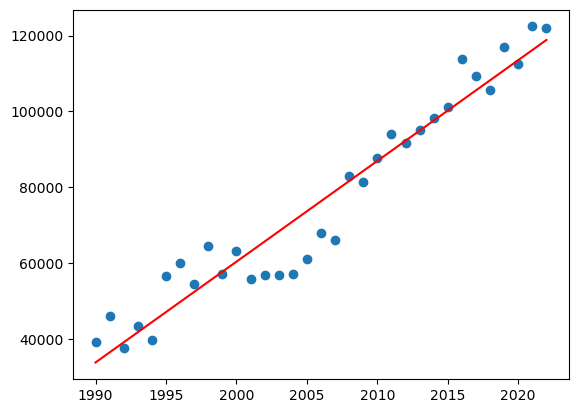

In [8]:
plt.scatter(data['Years'], data['Salary'])
plt.plot(data['Years'], model.predict(X), c='red')
plt.show()

### Defining the Predict Function


In [9]:
def predict(x):
    return intercept + coefficient * x

### Creating the Predicted Salary Data

In [50]:
predicted_data = pd.DataFrame({'Years': [i for i in range(2023,2051)],
                               'Salary': [predict(i) for i in range(2023,2051)]})
predicted_data

,Years,Salary
0,2023,121492.440341
1,2024,124147.492981
2,2025,126802.545622
3,2026,129457.598262
4,2027,132112.650902
5,2028,134767.703543
6,2029,137422.756183
7,2030,140077.808824
8,2031,142732.861464
9,2032,145387.914104


### Joinig The Predicted Data and our Primary Data

In [62]:
complete_data = pd.concat([data,predicted_data], ignore_index=True)
complete_data = complete_data.sort_values('Years', ignore_index=True)
complete_data

,Years,Salary,material 1,material 2,demand,price
0,1990,39343.000000,200.000000,89.600000,103.0,1200.0
1,1991,46205.000000,212.000000,92.662500,104.0,1375.0
2,1992,37731.000000,224.720000,95.807250,101.0,1451.0
3,1993,43525.000000,238.203200,99.034819,99.0,1593.0
4,1994,39891.000000,252.495392,102.345626,95.0,1718.5
...,...,...,...,...,...,...
56,2046,182558.651070,NaN,NaN,NaN,NaN
57,2047,185213.703710,NaN,NaN,NaN,NaN
58,2048,187868.756350,NaN,NaN,NaN,NaN
59,2049,190523.808991,NaN,NaN,NaN,NaN


## Future Values for Materials


In [63]:
material_future_values = [present_to_future(0.06, i, data.loc[data['Years'] == 2022, 'material 1']) for i in range(1, 29)]
material_future_values = np.array(material_future_values).reshape(28,)
material_future_values


array([1368.11797656, 1450.20505515, 1537.21735846, 1629.45039997,
       1727.21742397, 1830.85046941, 1940.70149757, 2057.14358743,
       2180.57220267, 2311.40653483, 2450.09092692, 2597.09638254,
       2752.92216549, 2918.09749542, 3093.18334514, 3278.77434585,
       3475.5008066 , 3684.030855  , 3905.0727063 , 4139.37706868,
       4387.7396928 , 4651.00407436, 4930.06431883, 5225.86817796,
       5539.42026863, 5871.78548475, 6224.09261384, 6597.53817067])

In [64]:
print("Length of material_future_values:", len(material_future_values))


Length of material_future_values: 28


In [65]:
material1_future = pd.DataFrame({'Years': [i for i in range(2023, 2051)],
                                 'material 1': material_future_values})

material1_future

,Years,material 1
0,2023,1368.117977
1,2024,1450.205055
2,2025,1537.217358
3,2026,1629.450400
4,2027,1727.217424
5,2028,1830.850469
6,2029,1940.701498
7,2030,2057.143587
8,2031,2180.572203
9,2032,2311.406535


,Years,material 1_x,Salary,material 1_y,material 2,demand,price
0,2023,1368.117977,121492.440341,NaN,NaN,NaN,NaN
1,2024,1450.205055,124147.492981,NaN,NaN,NaN,NaN
2,2025,1537.217358,126802.545622,NaN,NaN,NaN,NaN
3,2026,1629.450400,129457.598262,NaN,NaN,NaN,NaN
4,2027,1727.217424,132112.650902,NaN,NaN,NaN,NaN
5,2028,1830.850469,134767.703543,NaN,NaN,NaN,NaN
6,2029,1940.701498,137422.756183,NaN,NaN,NaN,NaN
7,2030,2057.143587,140077.808824,NaN,NaN,NaN,NaN
8,2031,2180.572203,142732.861464,NaN,NaN,NaN,NaN
9,2032,2311.406535,145387.914104,NaN,NaN,NaN,NaN
